## AI Mini Project


#### Prakarsh Gour - 18070124049
#### Siddharth Vyas - 18070124067
#### Vibhor Bhargava - 18070124076

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for splitting data
from sklearn.model_selection import train_test_split

# for logistic regression
from sklearn.linear_model import LogisticRegression

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# for Decision Tree
from sklearn.tree import DecisionTreeClassifier

# for Random Forest
from sklearn.ensemble import RandomForestClassifier

# for Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# for performance matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# for scaling training data
from sklearn.preprocessing import StandardScaler

In [3]:
# importing data

income_data = pd.read_csv("income.csv")

In [4]:
data = income_data.copy()

## EDA

In [5]:
data.shape

(31978, 13)

In [6]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [7]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [9]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [10]:
# summary of numercal variables
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [11]:
# summary of categorical variables
data.describe(include='O')

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [12]:
data['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [13]:
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
# there is a value "?"

In [15]:
data['JobType'].unique()

array([' Private', ' Federal-gov', ' ?', ' Self-emp-inc',
       ' Self-emp-not-inc', ' Local-gov', ' State-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [16]:
data['occupation'].unique()

array([' Adm-clerical', ' Armed-Forces', ' Prof-specialty',
       ' Craft-repair', ' Sales', ' Exec-managerial',
       ' Machine-op-inspct', ' ?', ' Transport-moving',
       ' Farming-fishing', ' Tech-support', ' Other-service',
       ' Handlers-cleaners', ' Protective-serv', ' Priv-house-serv'],
      dtype=object)

In [17]:
data = pd.read_csv("income.csv", na_values=[' ?'])

In [18]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [19]:
missing_data = data[data.isnull().any(axis=1)]
missing_data

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
8,17,NaN,11th,Never-married,NaN,Own-child,White,Female,0,0,5,United-States,"less than or equal to 50,000"
17,32,NaN,Some-college,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
29,22,NaN,Some-college,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
42,52,NaN,12th,Never-married,NaN,Other-relative,Black,Male,594,0,40,United-States,"less than or equal to 50,000"
44,63,NaN,1st-4th,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31892,59,NaN,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
31934,20,NaN,HS-grad,Never-married,NaN,Other-relative,White,Female,0,0,35,United-States,"less than or equal to 50,000"
31945,28,NaN,Some-college,Married-civ-spouse,NaN,Wife,White,Female,0,1887,40,United-States,"greater than 50,000"
31967,80,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Male,0,0,24,United-States,"less than or equal to 50,000"


In [20]:
# Missing values in jobtypes = 1809
# Missing values in ocuupation = 1816
# 1809 rows were both jobtypes and occupation is missing
# 7 rows where only occupation is missing, because job type is "never worked"
# We can't understand the way/logic to fill these missing values

In [21]:
data.dropna(axis=0, inplace=True)

In [22]:
data.shape

(30162, 13)

In [23]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

### Checking realtionship of features

In [24]:
data.corr()

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


In [25]:
# all correlation are close to zero, hence there is no correlation

In [26]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [27]:
# possible features - 'age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
#                     'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
#                     'hoursperweek', 'nativecountry'

# label - SalStat

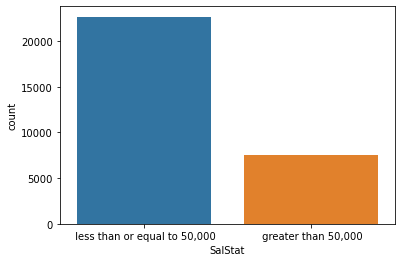

In [28]:
# bar plot of sal stat
sns.countplot(x='SalStat', data=data)

In [29]:
# 75% of people have salary <=50,000

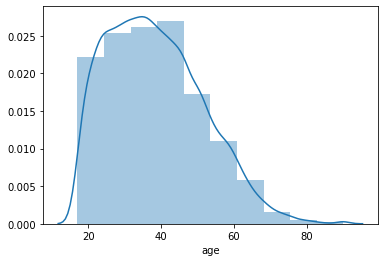

In [31]:
# histogram of age
sns.distplot(data['age'], bins=10)

In [32]:
# people with age 20-45 have high frequency

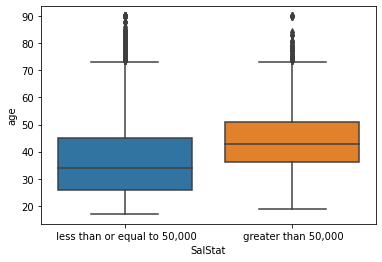

In [33]:
# box plot - age vs salstat
sns.boxplot(x='SalStat', y='age', data=data)

In [34]:
# people with age 35-50 are more likely to earn >50,000
# people with age 25-35 are more likely to earn <=50,000

# therefore, age is a significant variable

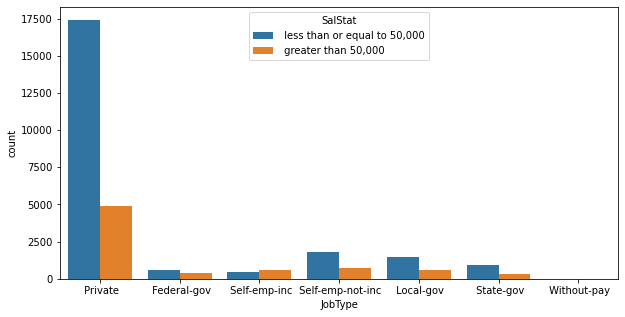

In [35]:
# barplot - jobtype vs sal stat
plt.figure(figsize=(10, 5))
sns.countplot(x='JobType', hue='SalStat', data=data)

In [36]:
pd.crosstab(index=data['JobType'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
JobType,,
Federal-gov,38.706257,61.293743
Local-gov,29.462990,70.537010
Private,21.879207,78.120793
Self-emp-inc,55.865922,44.134078
Self-emp-not-inc,28.571429,71.428571
State-gov,26.896013,73.103987
Without-pay,0.000000,100.000000


In [37]:
# 56% of self employed people earn more than 50,000.
# hence an important variable in avoiding the missuse of subsidies

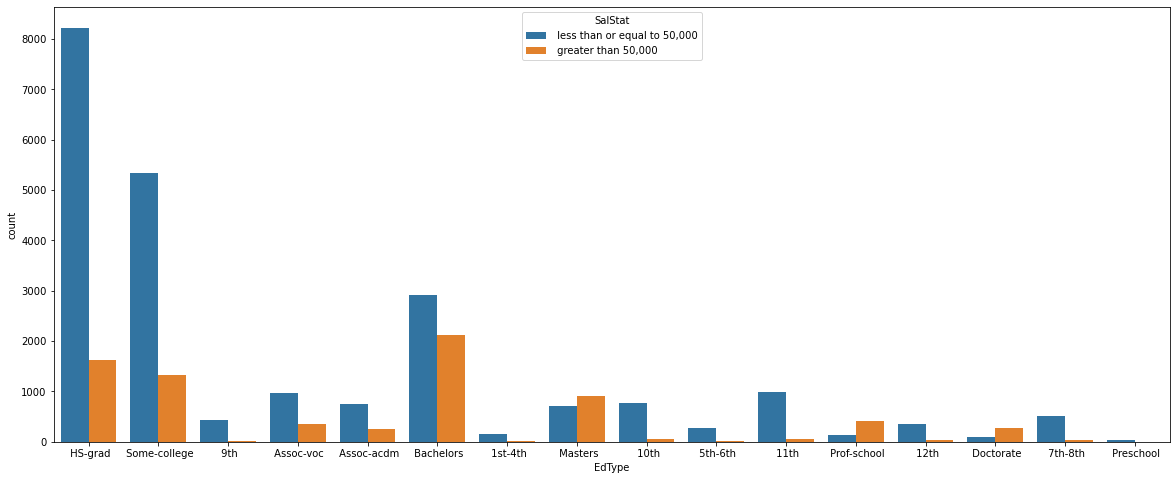

In [38]:
# Education vs salary stat
plt.figure(figsize=(20, 8))
sns.countplot(x='EdType', hue='SalStat', data=data)

In [39]:
pd.crosstab(index=data['EdType'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,7.195122,92.804878
11th,5.629771,94.370229
12th,7.692308,92.307692
1st-4th,3.973510,96.026490
5th-6th,4.166667,95.833333
7th-8th,6.283662,93.716338
9th,5.494505,94.505495
Assoc-acdm,25.396825,74.603175
Assoc-voc,26.319816,73.680184


In [40]:
# people with prof-school, masters, doctorate are more likely to earn >50,000
# hence an influencing variable in avoiding the missuse of subsidies

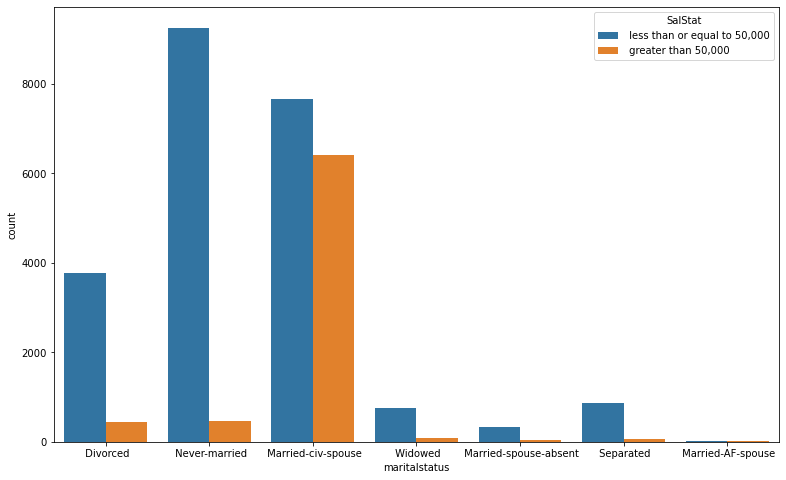

In [41]:
# Marital status vs salary stat
plt.figure(figsize=(13, 8))
sns.countplot(x='maritalstatus', hue='SalStat', data=data)

In [42]:
pd.crosstab(index=data['maritalstatus'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
maritalstatus,,
Divorced,10.726151,89.273849
Married-AF-spouse,47.619048,52.380952
Married-civ-spouse,45.495912,54.504088
Married-spouse-absent,8.378378,91.621622
Never-married,4.832408,95.167592
Separated,7.028754,92.971246
Widowed,9.673519,90.326481


In [43]:
# There seems to be no relation between salary status and marital status, therefore it is an insignicant feature

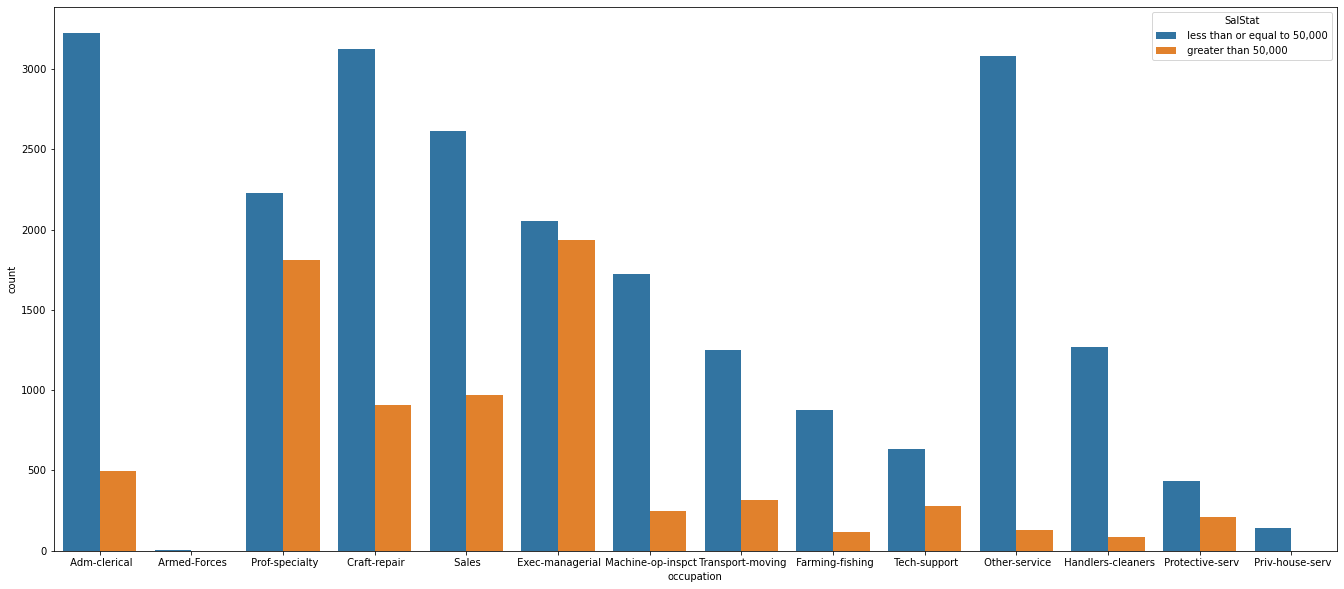

In [44]:
# Occupation vs salstat
plt.figure(figsize=(23, 10))
sns.countplot(x='occupation', hue='SalStat', data=data)

In [45]:
pd.crosstab(index=data['occupation'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,13.383499,86.616501
Armed-Forces,11.111111,88.888889
Craft-repair,22.531017,77.468983
Exec-managerial,48.522044,51.477956
Farming-fishing,11.627907,88.372093
Handlers-cleaners,6.148148,93.851852
Machine-op-inspct,12.461851,87.538149
Other-service,4.109589,95.890411
Priv-house-serv,0.699301,99.300699


In [46]:
# Exec-managerial and Prof-specialty
# people with >50,000 are more likely to work as managers and professionals
# hence an important variable in avoiding the missuse of subsidies

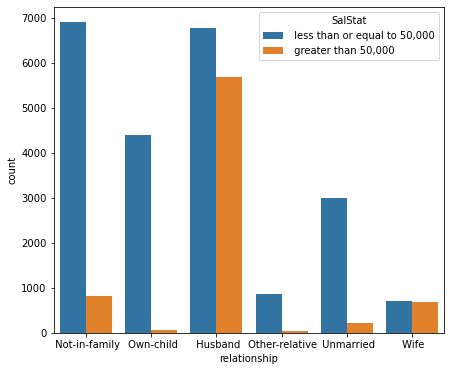

In [47]:
# relationship vs salstat
plt.figure(figsize=(7, 6))
sns.countplot(x='relationship', hue='SalStat', data=data)

In [48]:
pd.crosstab(index=data['relationship'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
relationship,,
Husband,45.566878,54.433122
Not-in-family,10.652343,89.347657
Other-relative,3.937008,96.062992
Own-child,1.433050,98.566950
Unmarried,6.631382,93.368618
Wife,49.359886,50.640114


In [49]:
# There seems to be no relation between salary status and relationship, therefore it is an insignicant feature

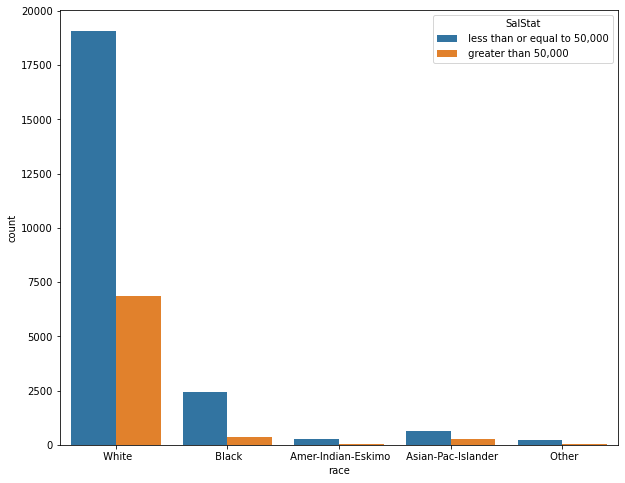

In [50]:
# race vs salstat
plt.figure(figsize=(10, 8))
sns.countplot(x='race', hue='SalStat', data=data)

In [51]:
pd.crosstab(index=data['race'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
race,,
Amer-Indian-Eskimo,11.888112,88.111888
Asian-Pac-Islander,27.709497,72.290503
Black,12.992545,87.007455
Other,9.090909,90.909091
White,26.371804,73.628196


In [52]:
# There seems to be no relation between salary status and race, therefore it is an insignicant feature

In [53]:
gender = pd.crosstab(index=data['gender'], columns='count', normalize=True)
gender

col_0,count
gender,
Female,0.324315
Male,0.675685


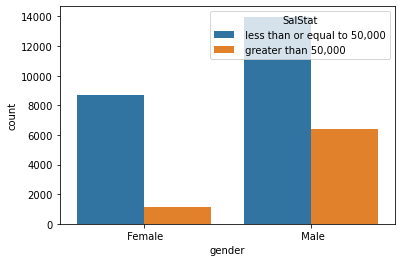

In [54]:
# gender vs salstat
sns.countplot(x='gender', hue='SalStat', data=data)

In [55]:
gender_salstat = pd.crosstab(index=data['gender'], columns=data['SalStat'], margins=True, normalize=True)
gender_salstat

SalStat,"greater than 50,000","less than or equal to 50,000",All
gender,,,
Female,0.036868,0.287448,0.324315
Male,0.212055,0.463630,0.675685
All,0.248922,0.751078,1.000000


In [56]:
# it is observed that male have a greater chance of earning more than 50,000 than female

C:\Users\This PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


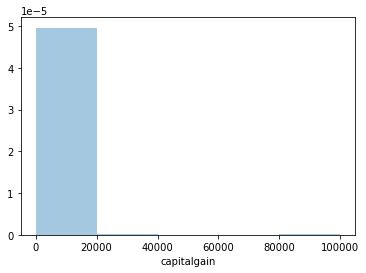

In [61]:
# Capital gain
sns.distplot(data.capitalgain, bins=5)

In [62]:
# 95% have capital gain = 0
# there seems to be no realtion between sal stat and capital gain

C:\Users\This PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


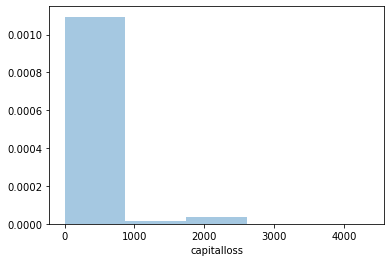

In [64]:
# Capital loss
sns.distplot(data['capitalloss'], bins=5)

In [65]:
# 95% have capital loss = 0
# there seems to be no realtion between sal stat and capital loss

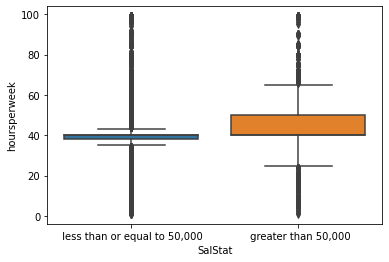

In [66]:
# Box plot - hours per week vs salstat
sns.boxplot(x='SalStat', y='hoursperweek', data=data)

In [67]:
# people with >50,000 are more likely to spend 40-50 hours per week

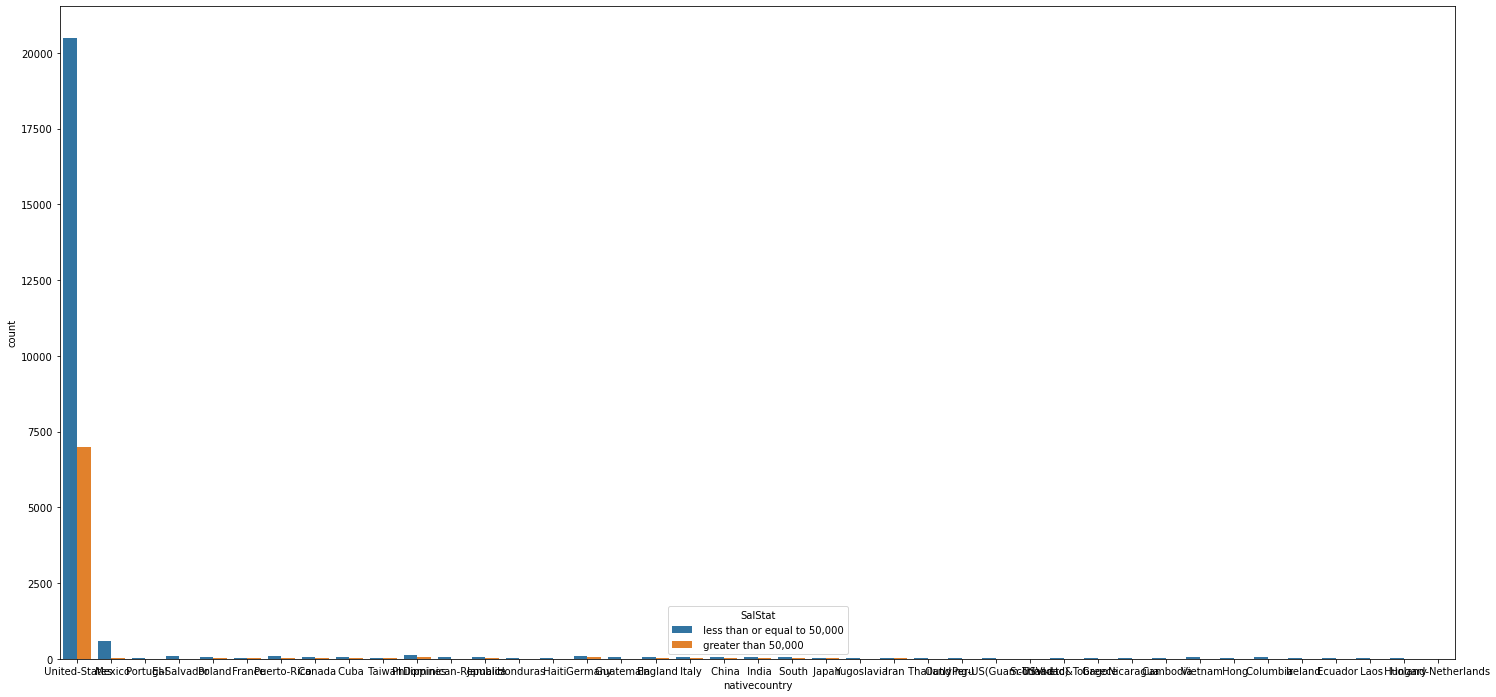

In [68]:
# nativecountry vs salstat# relationship vs salstat
plt.figure(figsize=(25, 12))
sns.countplot(x='nativecountry', hue='SalStat', data=data)

In [69]:
pd.crosstab(index=data['nativecountry'], columns=data['SalStat'], normalize='index').apply(lambda x: x*100, axis=1)

SalStat,"greater than 50,000","less than or equal to 50,000"
nativecountry,,
Cambodia,38.888889,61.111111
Canada,33.644860,66.355140
China,29.411765,70.588235
Columbia,3.571429,96.428571
Cuba,27.173913,72.826087
Dominican-Republic,2.985075,97.014925
Ecuador,14.814815,85.185185
El-Salvador,9.000000,91.000000
England,34.883721,65.116279


In [70]:
# There seems to be no relation between salary status and native country, therefore it is an insignicant feature

In [71]:
# removing insignificant features

In [72]:
data.shape

(30162, 13)

In [73]:
data.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [74]:
insig_features = ['maritalstatus', 'relationship', 'race', 'capitalgain', 'capitalloss', 'nativecountry']

In [75]:
data.drop(insig_features, axis=1, inplace=True)

In [76]:
data.shape

(30162, 7)

In [77]:
data.columns

Index(['age', 'JobType', 'EdType', 'occupation', 'gender', 'hoursperweek',
       'SalStat'],
      dtype='object')

In [78]:
data.head()

,age,JobType,EdType,occupation,gender,hoursperweek,SalStat
0,45,Private,HS-grad,Adm-clerical,Female,28,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Armed-Forces,Male,40,"less than or equal to 50,000"
2,44,Private,Some-college,Prof-specialty,Male,40,"greater than 50,000"
3,27,Private,9th,Craft-repair,Male,40,"less than or equal to 50,000"
4,20,Private,Some-college,Sales,Male,35,"less than or equal to 50,000"


In [79]:
data['SalStat'] = data['SalStat'].map({' less than or equal to 50,000':0, ' greater than 50,000':1})

In [80]:
data['SalStat'].value_counts()

0    22654
1     7508
Name: SalStat, dtype: int64

In [81]:
data = pd.get_dummies(data, drop_first=True)

In [82]:
data.shape

(30162, 38)

In [83]:
data.columns

Index(['age', 'hoursperweek', 'SalStat', 'JobType_ Local-gov',
       'JobType_ Private', 'JobType_ Self-emp-inc',
       'JobType_ Self-emp-not-inc', 'JobType_ State-gov',
       'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th',
       'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th',
       'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors',
       'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters',
       'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'gender_ Male'],
      dtype='object')

In [84]:
features = list(set(data.columns)-set(['SalStat']))
features

['EdType_ 5th-6th',
 'occupation_ Prof-specialty',
 'EdType_ Preschool',
 'EdType_ Masters',
 'EdType_ 7th-8th',
 'occupation_ Other-service',
 'hoursperweek',
 'JobType_ Self-emp-inc',
 'JobType_ State-gov',
 'occupation_ Armed-Forces',
 'EdType_ Some-college',
 'EdType_ 11th',
 'EdType_ HS-grad',
 'JobType_ Private',
 'JobType_ Self-emp-not-inc',
 'occupation_ Exec-managerial',
 'EdType_ 12th',
 'EdType_ Doctorate',
 'occupation_ Priv-house-serv',
 'gender_ Male',
 'EdType_ 1st-4th',
 'age',
 'JobType_ Without-pay',
 'EdType_ Assoc-acdm',
 'occupation_ Sales',
 'occupation_ Transport-moving',
 'occupation_ Handlers-cleaners',
 'EdType_ 9th',
 'occupation_ Protective-serv',
 'occupation_ Machine-op-inspct',
 'occupation_ Craft-repair',
 'occupation_ Farming-fishing',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'JobType_ Local-gov',
 'EdType_ Prof-school',
 'occupation_ Tech-support']

In [85]:
len(features)

37

In [86]:
len(data.columns)

38

In [87]:
X = data[features].values

In [88]:
Y = data['SalStat'].values

In [89]:
X.shape

(30162, 37)

In [90]:
Y.shape

(30162,)

In [91]:
# Spliting data, and scaling data

In [92]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.35, random_state=11)

In [93]:
scaler = StandardScaler()

scaled_Xtrain = scaler.fit_transform(Xtrain)
scaled_Xtest = scaler.transform(Xtest)

### Logistic Regression

In [94]:
LR_model = LogisticRegression(max_iter=10000)
LR_model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=10000)

In [95]:
LR_prediction = LR_model.predict(Xtest)

In [96]:
LR_train_score = LR_model.score(Xtrain, Ytrain)
LR_test_score = LR_model.score(Xtest, Ytest)

In [97]:
print(LR_train_score)
print(LR_test_score) 

0.8067329762815608
0.8083735909822867


In [98]:
LR_confusion_matrix = confusion_matrix(Ytest, LR_prediction)
LR_confusion_matrix

array([[7416,  544],
       [1479, 1118]], dtype=int64)

In [99]:
LR_classification_report = classification_report(Ytest, LR_prediction)
print(LR_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7960
           1       0.67      0.43      0.53      2597

    accuracy                           0.81     10557
   macro avg       0.75      0.68      0.70     10557
weighted avg       0.79      0.81      0.79     10557



In [100]:
print("Misclassified samples = ", (Ytest!=LR_prediction).sum()) 

Misclassified samples =  2023


### LR with shuffling

In [102]:
LR_bagging_model_shuffling = BaggingClassifier(n_estimators=30, base_estimator=LR_model)

In [103]:
LR_bagging_model_shuffling.fit(Xtrain, Ytrain)


BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  n_estimators=30)

In [104]:
LR_bagging_model_shuffling_predictions = LR_bagging_model_shuffling.predict(Xtest)

In [105]:
print(LR_bagging_model_shuffling.score(Xtrain, Ytrain))
print(LR_bagging_model_shuffling.score(Xtest, Ytest))

0.8071410354501403
0.8085630387420669


In [106]:
LR_confusion_matrix_shuffling = confusion_matrix(Ytest, LR_bagging_model_shuffling_predictions)
LR_confusion_matrix_shuffling

array([[7416,  544],
       [1477, 1120]], dtype=int64)

In [107]:
LR_classification_report_shuffling = classification_report(Ytest, LR_bagging_model_shuffling_predictions)
print(LR_classification_report_shuffling)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7960
           1       0.67      0.43      0.53      2597

    accuracy                           0.81     10557
   macro avg       0.75      0.68      0.70     10557
weighted avg       0.79      0.81      0.79     10557



In [108]:
print("Misclassified samples = ", (Ytest!=LR_bagging_model_shuffling_predictions).sum()) 

Misclassified samples =  2021


### LR with sampling with replacement

In [110]:
sample_size = int(round(np.sqrt(len(Xtrain))))

In [111]:
LR_bagging_model_wr = BaggingClassifier(n_estimators=30,
                                       base_estimator=LR_model,
                                       max_samples=sample_size,
                                       bootstrap=True)

In [112]:
LR_bagging_model_wr.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  max_samples=140, n_estimators=30)

In [113]:
LR_bagging_model_wr_predictions = LR_bagging_model_wr.predict(Xtest)

In [114]:
print(LR_bagging_model_wr.score(Xtrain, Ytrain))
print(LR_bagging_model_wr.score(Xtest, Ytest))

0.7906146391226728
0.7919863597612958


In [115]:
LR_confusion_matrix_wr = confusion_matrix(Ytest, LR_bagging_model_wr_predictions)
LR_confusion_matrix_wr

array([[7465,  495],
       [1701,  896]], dtype=int64)

In [116]:
LR_classification_report_wr = classification_report(Ytest, LR_bagging_model_wr_predictions)
print(LR_classification_report_wr)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7960
           1       0.64      0.35      0.45      2597

    accuracy                           0.79     10557
   macro avg       0.73      0.64      0.66     10557
weighted avg       0.77      0.79      0.77     10557



In [117]:
print("Misclassified samples = ", (Ytest!=LR_bagging_model_wr_predictions).sum()) 

Misclassified samples =  2196


### LR with sampling without replacement

In [119]:
LR_bagging_model_wor = BaggingClassifier(n_estimators=30,
                                       base_estimator=LR_model,
                                       max_samples=sample_size,
                                       bootstrap=False)

In [120]:
LR_bagging_model_wor.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  bootstrap=False, max_samples=140, n_estimators=30)

In [121]:
LR_bagging_model_wor_predictions = LR_bagging_model_wor.predict(Xtest)

In [122]:
print(LR_bagging_model_wor.score(Xtrain, Ytrain))
print(LR_bagging_model_wor.score(Xtest, Ytest))

0.7905126243305279
0.7955858671971204


In [123]:
LR_confusion_matrix_wor = confusion_matrix(Ytest, LR_bagging_model_wor_predictions)
LR_confusion_matrix_wor

array([[7554,  406],
       [1752,  845]], dtype=int64)

In [124]:
LR_classification_report_wor = classification_report(Ytest, LR_bagging_model_wor_predictions)
print(LR_classification_report_wor)

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7960
           1       0.68      0.33      0.44      2597

    accuracy                           0.80     10557
   macro avg       0.74      0.64      0.66     10557
weighted avg       0.78      0.80      0.77     10557



In [125]:
print("Misclassified samples = ", (Ytest!=LR_bagging_model_wor_predictions).sum()) 

Misclassified samples =  2158


### KNN

In [127]:
KNN_model = KNeighborsClassifier(n_neighbors=51)
KNN_model.fit(scaled_Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=51)

In [128]:
KNN_prediction = KNN_model.predict(scaled_Xtest)

In [129]:
KNN_train_score = KNN_model.score(scaled_Xtrain, Ytrain)
KNN_test_score = KNN_model.score(scaled_Xtest, Ytest)

In [130]:
print(KNN_train_score)
print(KNN_test_score)

0.8100994644223413
0.8043951880269016


In [131]:
KNN_confusion_matrix = confusion_matrix(Ytest, KNN_prediction)
KNN_confusion_matrix

array([[7352,  608],
       [1457, 1140]], dtype=int64)

In [132]:
KNN_classification_report = classification_report(Ytest, KNN_prediction)
print(KNN_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      7960
           1       0.65      0.44      0.52      2597

    accuracy                           0.80     10557
   macro avg       0.74      0.68      0.70     10557
weighted avg       0.79      0.80      0.79     10557



In [133]:
print("Misclassified samples = ", (Ytest!=KNN_prediction).sum())

Misclassified samples =  2065


### Decision Tree

In [135]:
DT_model = DecisionTreeClassifier(max_depth=37)
DT_model.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=37)

In [136]:
DT_prediction = DT_model.predict(Xtest)

In [137]:
DT_train_score = DT_model.score(Xtrain, Ytrain)
DT_test_score = DT_model.score(Xtest, Ytest)

In [138]:
print(DT_train_score)
print(DT_test_score) 

0.9436368273399643
0.7577910391209624


In [139]:
DT_confusion_matrix = confusion_matrix(Ytest, DT_prediction)
DT_confusion_matrix

array([[6830, 1130],
       [1427, 1170]], dtype=int64)

In [140]:
DT_classification_report = classification_report(Ytest, DT_prediction)
print(DT_classification_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      7960
           1       0.51      0.45      0.48      2597

    accuracy                           0.76     10557
   macro avg       0.67      0.65      0.66     10557
weighted avg       0.75      0.76      0.75     10557



In [141]:
print("Misclassified samples = ", (Ytest!=DT_prediction).sum())

Misclassified samples =  2557


## DT with shuffling

In [143]:
DT_model_shuffling = BaggingClassifier(n_estimators=40, base_estimator=DT_model)

In [144]:
DT_model_shuffling.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=37),
                  n_estimators=40)

In [145]:
DT_model_shuffling_predictions = DT_model_shuffling.predict(Xtest)

In [146]:
print(DT_model_shuffling.score(Xtrain, Ytrain))
print(DT_model_shuffling.score(Xtest, Ytest))

0.94312675337924
0.7796722553755802


In [147]:
DT_confusion_matrix_shuffling = confusion_matrix(Ytest, DT_model_shuffling_predictions)
DT_confusion_matrix_shuffling

array([[7020,  940],
       [1386, 1211]], dtype=int64)

In [148]:
DT_classification_report_shuffling = classification_report(Ytest, DT_model_shuffling_predictions)
print(DT_classification_report_shuffling)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7960
           1       0.56      0.47      0.51      2597

    accuracy                           0.78     10557
   macro avg       0.70      0.67      0.68     10557
weighted avg       0.77      0.78      0.77     10557



In [149]:
print("Misclassified samples = ", (Ytest!=DT_model_shuffling_predictions).sum())

Misclassified samples =  2326


### DT with sampling with replacement

In [145]:
DT_model_wr = BaggingClassifier(n_estimators=40, base_estimator=DT_model, max_samples=sample_size, bootstrap=True)

In [146]:
DT_model_wr.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=37),
                  max_samples=140, n_estimators=40)

In [147]:
DT_model_wr_predictions = DT_model_wr.predict(Xtest)

In [148]:
print(DT_model_wr.score(Xtrain, Ytrain))
print(DT_model_wr.score(Xtest, Ytest))

0.8050497322111706
0.8072369044236052


In [149]:
DT_confusion_matrix_wr = confusion_matrix(Ytest, DT_model_wr_predictions)
DT_confusion_matrix_wr

array([[7457,  503],
       [1532, 1065]], dtype=int64)

In [150]:
DT_classification_report_wr = classification_report(Ytest, DT_model_wr_predictions)
print(DT_classification_report_wr)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7960
           1       0.68      0.41      0.51      2597

    accuracy                           0.81     10557
   macro avg       0.75      0.67      0.70     10557
weighted avg       0.79      0.81      0.79     10557



In [151]:
print("Misclassified samples = ", (Ytest!=DT_model_wr_predictions).sum())

Misclassified samples =  2035


### DT with sampling without replacement

In [153]:
DT_model_wor = BaggingClassifier(n_estimators=40, base_estimator=DT_model, max_samples=sample_size, bootstrap=False)

In [154]:
DT_model_wor.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=37),
                  bootstrap=False, max_samples=140, n_estimators=40)

In [155]:
DT_model_wor_predictions = DT_model_wor.predict(Xtest)

In [156]:
print(DT_model_wor.score(Xtrain, Ytrain))
print(DT_model_wor.score(Xtest, Ytest))

0.7983167559296098
0.8011745761106375


In [157]:
DT_confusion_matrix_wor = confusion_matrix(Ytest, DT_model_wor_predictions)
DT_confusion_matrix_wor

array([[7568,  392],
       [1707,  890]], dtype=int64)

In [158]:
DT_classification_report_wor = classification_report(Ytest, DT_model_wor_predictions)
print(DT_classification_report_wor)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7960
           1       0.69      0.34      0.46      2597

    accuracy                           0.80     10557
   macro avg       0.76      0.65      0.67     10557
weighted avg       0.79      0.80      0.78     10557



In [159]:
print("Misclassified samples = ", (Ytest!=DT_model_wor_predictions).sum())

Misclassified samples =  2099


## Random Forest

In [161]:
RF_model = RandomForestClassifier(n_estimators=30)
RF_model.fit(Xtrain, Ytrain)

RandomForestClassifier(n_estimators=30)

In [162]:
RF_model_predictions = RF_model.predict(Xtest)

In [163]:
print(RF_model.score(Xtrain, Ytrain))
print(RF_model.score(Xtest, Ytest))

0.9422086202499362
0.781093113573932


In [164]:
RF_confusion_matrix = confusion_matrix(Ytest, RF_model_predictions)
RF_confusion_matrix

array([[7028,  932],
       [1379, 1218]], dtype=int64)

In [165]:
RF_classification_report = classification_report(Ytest, RF_model_predictions)
print(RF_classification_report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7960
           1       0.57      0.47      0.51      2597

    accuracy                           0.78     10557
   macro avg       0.70      0.68      0.69     10557
weighted avg       0.77      0.78      0.77     10557



In [166]:
print("Misclassified samples = ", (Ytest!=RF_model_predictions).sum())

Misclassified samples =  2311


### RF with sampling with relacement

In [168]:
RF_model_wr = RandomForestClassifier(n_estimators=30, max_samples=sample_size, bootstrap=True)
RF_model_wr.fit(Xtrain, Ytrain)

RandomForestClassifier(max_samples=140, n_estimators=30)

In [169]:
RF_model_wr_predictions = RF_model_wr.predict(Xtest)

In [170]:
print(RF_model_wr.score(Xtrain, Ytrain))
print(RF_model_wr.score(Xtest, Ytest))

0.8
0.8012692999905277


In [171]:
RF_confusion_matrix_wr = confusion_matrix(Ytest, RF_model_wr_predictions)
RF_confusion_matrix_wr

array([[7558,  402],
       [1696,  901]], dtype=int64)

In [172]:
RF_classification_report_wr = classification_report(Ytest, RF_model_wr_predictions)
print(RF_classification_report_wr)

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7960
           1       0.69      0.35      0.46      2597

    accuracy                           0.80     10557
   macro avg       0.75      0.65      0.67     10557
weighted avg       0.79      0.80      0.78     10557



In [173]:
print("Misclassified samples = ", (Ytest!=RF_model_wr_predictions).sum())

Misclassified samples =  2098


### RF with sampling without relacement

In [175]:
RF_model_wor = RandomForestClassifier(n_estimators=30, max_samples=sample_size, bootstrap=False)
RF_model_wor.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=False, max_samples=140, n_estimators=30)

In [176]:
RF_model_predictions_wor = RF_model_wor.predict(Xtest)

In [177]:
print(RF_model_wor.score(Xtrain, Ytrain))
print(RF_model_wor.score(Xtest, Ytest))

0.9443509308849783
0.7735152031827224


In [178]:
RF_confusion_matrix_wor = confusion_matrix(Ytest, RF_model_predictions_wor)
RF_confusion_matrix_wor

array([[6993,  967],
       [1424, 1173]], dtype=int64)

In [179]:
RF_classification_report_wor = classification_report(Ytest, RF_model_predictions_wor)
print(RF_classification_report_wor)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      7960
           1       0.55      0.45      0.50      2597

    accuracy                           0.77     10557
   macro avg       0.69      0.67      0.67     10557
weighted avg       0.76      0.77      0.77     10557



In [180]:
print("Misclassified samples = ", (Ytest!=RF_model_predictions_wor).sum())

Misclassified samples =  2391
